
# Project: Investigate a Dataset (FBI Gun Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

*The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer
does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.*

**Questions:** 

 * What is the trend of total guns registeration over times?
 * What is the overall trend of purchases Gun Over the Times? 
 * Which year has the highest Number of registred Gun?
 * Which Months has the highest Number of registred Gun?
 * Which State has the highest Number of registred Gun?
 * Overall purchased types of gun Trend Over the Times
 * Most purchased Gun Type in the Year between 1997 to 2010
 * Most Purchased Gun Type in the Year between 2011 to 2017
 * What is the Rate of Hand Gun in each state?
 * What is the Rate of Long Gun Gun in each state?
 * Which census data is most associated with high gun per capita

In [107]:
# Load all the require libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [108]:
# load the dataset
census_df= pd.read_csv("U.S. Census Data.csv")
gun_df = pd.read_csv("gun_data_copy.csv")
census_df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [109]:
# let check the last dataset
census_df.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [110]:
# let drop the undisire rows
census_df = census_df.drop(census_df.index[65:]).reset_index()

In [111]:
# let change my index to be Fact 
census_df.set_index('Fact',inplace=True)
# let transform the DataFrame
census_df = census_df.T.reset_index()

In [112]:
census_df.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,index,0,1,2,3,4,5,6,7,8,...,55,56,57,58,59,60,61,62,63,64
1,Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
3,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
4,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""


In [113]:
# let remove the fisrt and second rows since it will not add any significant value to my analysis
census_df = census_df.drop(census_df.index[0:2]).reset_index()

In [114]:
# let rename my index column to state 
census_df = census_df.rename({"index":"state"}, axis=1)
# let drop the level_0 column
census_df = census_df.drop(columns='level_0')

In [115]:
# list of columns to be converted to float data type
float_columns = ['Population estimates base, April 1, 2010,  (V2016)','Population estimates, July 1, 2016,  (V2016)','Population, Census, April 1, 2010']

In [116]:
# let convert Population estimates, July 1, 2016,  (V2016) data type to float
for c in float_columns:
    census_df[c] = census_df[c].str.replace(",","").astype(float)

In [117]:
census_df.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,4863300.0,4780131.0,1.70%,4779736.0,6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,741894.0,710249.0,4.50%,710231.0,7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,6931071.0,6392301.0,8.40%,6392017.0,6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,2988248.0,2916025.0,2.50%,2915918.0,6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,39250017.0,37254522.0,5.40%,37253956.0,6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


In [118]:
# let query 2010 and 2016 census Data
census_clean = census_df[['state','Population estimates, July 1, 2016,  (V2016)','Population estimates base, April 1, 2010,  (V2016)']]

In [119]:
census_clean.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)"
0,Alabama,4863300.0,4780131.0
1,Alaska,741894.0,710249.0
2,Arizona,6931071.0,6392301.0
3,Arkansas,2988248.0,2916025.0
4,California,39250017.0,37254522.0


In [120]:
# statistics summary
census_clean.describe()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)"
count,5.000000e+01,5.000000e+01
mean,6.448927e+06,6.163127e+06
std,7.271769e+06,6.848463e+06
min,5.855010e+05,5.637670e+05
25%,1.850106e+06,1.833003e+06
50%,4.559320e+06,4.436412e+06
75%,7.198768e+06,6.680362e+06
max,3.925002e+07,3.725452e+07


In [121]:
# let check the first five row of gun data
gun_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [122]:
# let check the gun data infoormation
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [123]:
# let check the No. of unique state in gun data, so that i can compare it with census data
gun_df["state"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [124]:
# No. of unique state in census data
census_clean["state"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [125]:
remove_state = ["District of Columbia","Guam", "Mariana Islands","Puerto Rico","Virgin Islands","Mariana Islands"]

In [126]:
# remove the unmatch unique state for both census and gun data
for c in remove_state:
    gun_df.drop(gun_df[gun_df.state == c].index ,inplace = True)

In [127]:
# let convert month column to datetime
#gun_df["month"] = pd.to_datetime(gun_df["month"])

In [128]:
# change the month column to year
gun_df = gun_df.rename({"month":"year"}, axis=1)

In [129]:
gun_df.columns

Index(['year', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [130]:
# Droping the least important features regarded to my target questions
gun_clean = gun_df.drop(columns=['permit_recheck','admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other'])

In [131]:
# fill NaN value with 0
def my_function(data):
    my_df = data.copy()
    my_df = data.fillna(0)
    return my_df

In [132]:
gun_clean = my_function(gun_clean)

In [133]:
gun_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 8 columns):
year        11350 non-null object
state       11350 non-null object
permit      11350 non-null float64
handgun     11350 non-null float64
long_gun    11350 non-null float64
other       11350 non-null float64
multiple    11350 non-null int64
totals      11350 non-null int64
dtypes: float64(4), int64(2), object(2)
memory usage: 798.0+ KB


In [134]:
gun_clean.head()

,year,state,permit,handgun,long_gun,other,multiple,totals
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0,317,32019
1,2017-09,Alaska,209.0,2320.0,2930.0,219.0,160,6303
2,2017-09,Arizona,5069.0,11063.0,7946.0,920.0,631,28394
3,2017-09,Arkansas,2935.0,4347.0,6063.0,165.0,366,17747
4,2017-09,California,57839.0,37165.0,24581.0,2984.0,0,123506


# Exploratory Data Analysis

In [135]:
# statistics summary
gun_clean.describe()

,permit,handgun,long_gun,other,multiple,totals
count,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000
mean,7040.389515,6509.303877,8575.439648,174.472423,295.059471,23734.978502
std,24799.120415,8829.284061,9416.217660,956.508452,816.710594,33437.577310
min,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,0.000000,1327.250000,2778.000000,0.000000,41.000000,6472.000000
50%,813.500000,3622.500000,5893.000000,0.000000,151.000000,14050.000000
75%,5136.750000,7987.750000,11021.500000,113.000000,328.750000,27537.000000
max,522188.000000,107224.000000,108058.000000,77929.000000,38907.000000,541978.000000


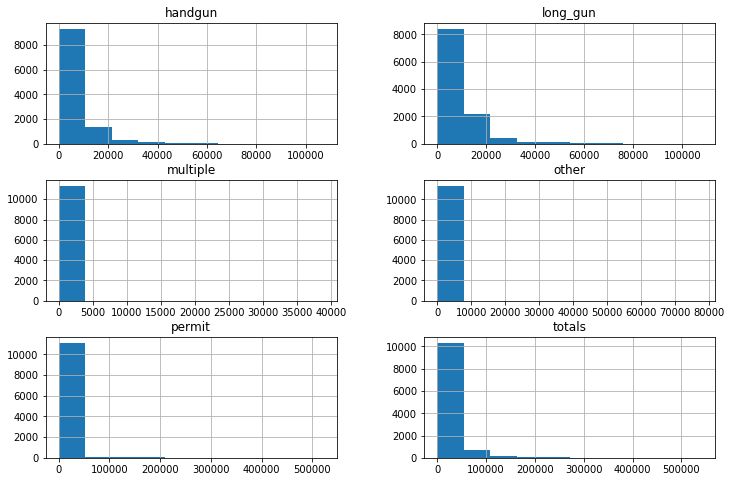

In [136]:
# let check the distrobution of gun_data
gun_clean.hist(figsize=(12,8));

**Base on the above graph it clearly show that majority of the registred gun in a month does not exceed 100,000**

# What is the trend of total guns registeration and Purchased over times?

In [137]:
# let split the the year from the months 
gun_clean["Year"] = gun_clean['year'].apply(lambda x: int(x.split('-')[0]) )

In [138]:
# let query the Year and total of registred gun
tren_data = gun_clean[["Year","totals"]]

In [139]:
# select the purchases guns
purc_gun = gun_clean.drop(columns=["state","totals","permit","year"])

In [140]:
# list of purchaese guns
purc_list = ["handgun","long_gun","other","multiple"]

In [141]:
# create new column that contain the overal total of purchaese guns
purc_gun["total"] = purc_gun[purc_list].sum(axis=1)

In [142]:
purc_gun_trend = purc_gun[["Year","total"]]

In [143]:
# fisrt five row trend registred gun
tren_data.head()

,Year,totals
0,2017,32019
1,2017,6303
2,2017,28394
3,2017,17747
4,2017,123506


In [144]:
# first five row of purchased gun
purc_gun.head()

,handgun,long_gun,other,multiple,Year,total
0,5734.0,6320.0,221.0,317,2017,12592.0
1,2320.0,2930.0,219.0,160,2017,5629.0
2,11063.0,7946.0,920.0,631,2017,20560.0
3,4347.0,6063.0,165.0,366,2017,10941.0
4,37165.0,24581.0,2984.0,0,2017,64730.0


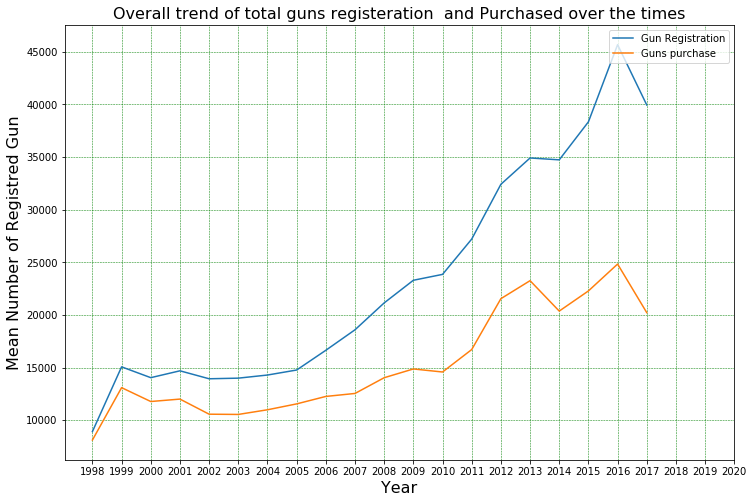

In [145]:
plt.figure(figsize=(12,8))
plot_1 = tren_data.groupby("Year").totals.agg("mean")
plot_2 = purc_gun_trend.groupby("Year").total.agg("mean")
plot_1.plot(figsize=(12,8))
plot_2.plot(figsize=(12,8))
plt.xlabel("Year", fontsize=16)
plt.ylabel("Mean Number of Registred Gun", fontsize=16)
plt.title("Overall trend of total guns registeration  and Purchased over the times", fontsize=16)
plt.xticks(np.arange(1998,2021))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.legend(["Gun Registration", "Guns purchase"], loc ="upper right");

**This graph is clearly show that the number of registred and purchased gun are increasing every year**

# Which year has the highest Number of registred Gun

In [146]:
# spliting the year from the date
gun_clean['Yr']=gun_clean['year'].apply(lambda x: int(x.split('-')[0]) )

In [147]:
plot_3 = gun_clean.groupby(gun_clean.Yr).agg({'totals':lambda x: x.mean()})

In [148]:
# my def function
def my_plot(plot):
    plot_3.sort_values(by="totals", ascending=False).plot(kind="bar",figsize=(12,5))
    plt.xlabel("Year", fontsize=13)
    plt.ylabel("Number of Registred Guns",fontsize=13)
    plt.title("Graph of Years with Highest Registred Guns",fontsize=13)
    plt.grid(color = 'dimgrey', linestyle = '--', linewidth = 0.5);
plt.show()

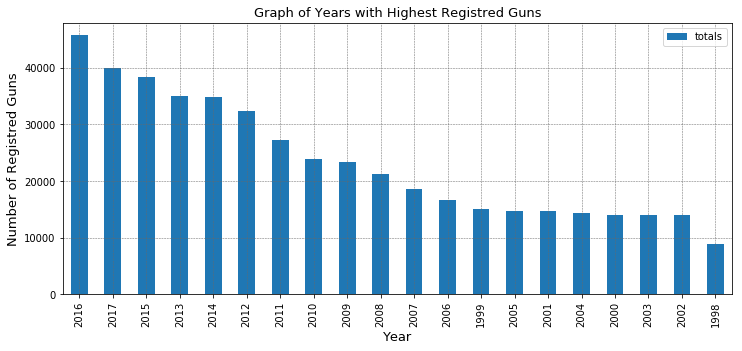

In [149]:
my_plot(plot_3)

**2016 has the highest number of registred gun**

# Months with  the highest Number of registred Gun

In [150]:
# spliting months from the year data type
gun_clean['month']=gun_clean['year'].apply(lambda x: int(x.split('-')[1]) )
gun_clean['month']=gun_clean.month.replace({1:'January',2:'Febuary',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

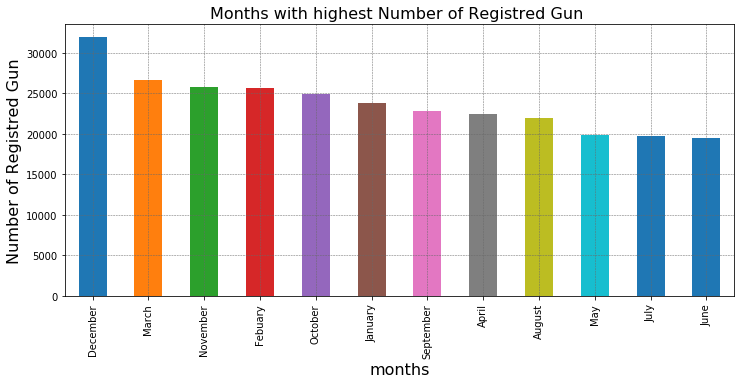

In [151]:
output = gun_clean.groupby([gun_clean.state,gun_clean.month]).agg({'totals':lambda x: x.mean()})
col = ['January','Febuary','March','April','May','June','July','August','September','October','November','December']
index = gun_clean.state.unique()
index.sort()
new_df = pd.DataFrame(columns=col,index=index)
for (ind, row) in new_df.iterrows():
   
   temp = list(output.loc[ind].index)
   
   for i in col:
     if i not in temp:
       new_df.loc[ind][i] = 0
     else:
       new_df.loc[ind][i] = output.loc[ind].loc[i].values[0]
   
plt.figure(figsize=(12,5))
new_df.mean().sort_values(ascending=False).plot(kind="bar")
plt.xlabel('months', fontsize=16)
plt.ylabel('Number of Registred Gun',fontsize=16)
plt.title('Months with highest Number of Registred Gun ',fontsize=16)
plt.grid(color = 'dimgrey', linestyle = '--', linewidth = 0.5);

**December has the highest number of gun registration**

In [152]:
new_df.head()

,January,Febuary,March,April,May,June,July,August,September,October,November,December
Alabama,30414,33860.3,29788.8,22692.8,21547.8,22156.9,23355.1,27123.9,27261.7,29495.9,35710.6,51096.2
Alaska,3811.89,4436.47,5023.21,5397.05,4696.53,4411.63,4547.11,5460,4912.74,6473.78,4779.89,6266.37
Arizona,19283.5,22046.9,21685.1,19087.4,17304.7,16924.7,17002.2,18987.2,18515.3,18525.8,18572.7,25971.8
Arkansas,15473.7,19370.2,16918.1,13513.2,11984.5,12118.8,12567.3,15014.8,16102.3,18676.8,21246.2,25504.2
California,79836.9,78987.2,92495.8,83495.7,80202.4,78091.9,77339.3,81520.9,78130.5,82524.7,83273.9,109184


#  Top 10 State with the highest Number of registred Gun

In [153]:
plot_4 = gun_clean.groupby(gun_clean.state).agg({'totals':lambda x: x.mean()}).sort_values(by = "totals", ascending=False).head(10)
plot_4

,totals
state,
Kentucky,131112.044053
Texas,85617.559471
California,83762.392070
Illinois,68156.537445
Pennsylvania,57858.484581
Florida,51523.246696
Ohio,37280.810573
North Carolina,34262.947137
Indiana,34084.458150


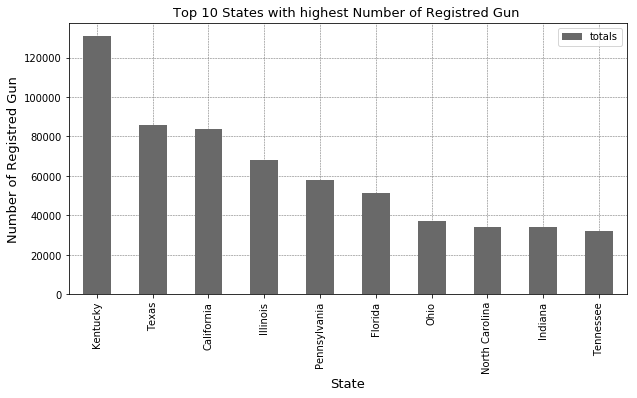

In [154]:
plot_4.plot(kind="bar",color= "dimgray",figsize=(10,5))
plt.xlabel("State", fontsize=13)
plt.ylabel("Number of Registred Gun",fontsize=13)
plt.title('Top 10 States with highest Number of Registred Gun ',fontsize=13)
plt.grid(color = 'dimgrey', linestyle = '--', linewidth = 0.5);

**Kentuckey City has the highest number of gun registration**

# Overall purchased type of gun Trend Over the Times

In [155]:
gun_type = (gun_clean.groupby("Year")["handgun","long_gun","other","multiple"].agg("mean")).sort_values(by="Year", ascending=False)

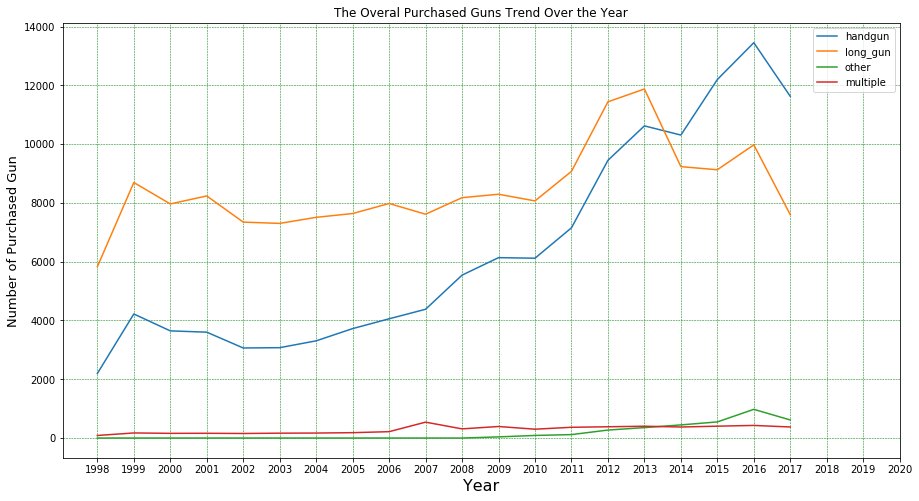

In [156]:
gun_type.plot(figsize=(15,8))
plt.xlabel("Year", fontsize=16)
plt.ylabel("Number of Purchased Gun", fontsize=13)
plt.title("The Overal Purchased Guns Trend Over the Year")
plt.xticks(np.arange(1998,2021))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5);

**The graph show an increase in purchased handgun and long gun every year, while other and multiple gun show plattered over the years**

#  Most purchased Gun Type in the Year between 1997 to 2010

In [157]:
# let check the purchased gun below 2010 dataset
gun_below_2010 = purc_gun[purc_gun["Year"] <= 2010].reset_index().drop(columns="index")

In [158]:
gun_below_2010.head()

,handgun,long_gun,other,multiple,Year,total
0,13978.0,24298.0,152.0,569,2010,38997.0
1,2553.0,3950.0,93.0,146,2010,6742.0
2,9943.0,9814.0,219.0,431,2010,20407.0
3,5816.0,12455.0,62.0,257,2010,18590.0
4,24519.0,32100.0,0.0,0,2010,56619.0


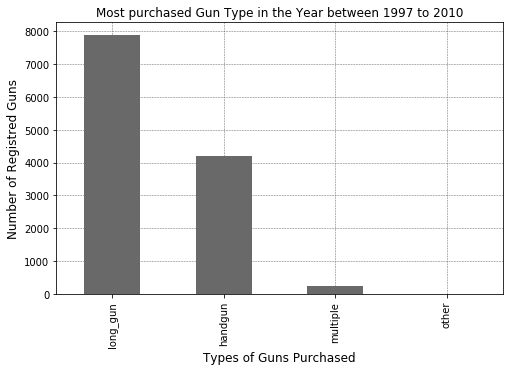

In [159]:
plot_5 = gun_below_2010[["handgun","long_gun","other","multiple"]].mean().sort_values(ascending=False)
plot_5.plot(kind="bar", figsize=(8,5),color= "dimgray")
plt.xlabel("Types of Guns Purchased",fontsize=12)
plt.ylabel("Number of Registred Guns",fontsize=12)
plt.title("Most purchased Gun Type in the Year between 1997 to 2010",fontsize=12)
plt.grid(color = 'dimgrey', linestyle = '--', linewidth = 0.5);

**Long gun is the most purchased gun type between 1997 to 2010**

# Most Purchased Gun Type in the Year between 2011 to 2017

In [160]:
# let check the purchased gun above 2010 dataset
gun_above_2010 = purc_gun[purc_gun["Year"] >= 2011].reset_index().drop(columns="index")

In [161]:
gun_above_2010.head()

,handgun,long_gun,other,multiple,Year,total
0,5734.0,6320.0,221.0,317,2017,12592.0
1,2320.0,2930.0,219.0,160,2017,5629.0
2,11063.0,7946.0,920.0,631,2017,20560.0
3,4347.0,6063.0,165.0,366,2017,10941.0
4,37165.0,24581.0,2984.0,0,2017,64730.0


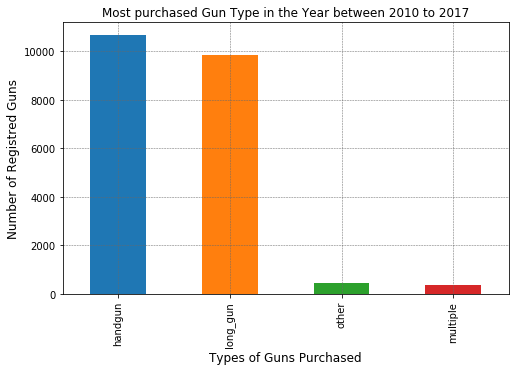

In [162]:
plot_6 = gun_above_2010[["handgun","long_gun","other","multiple"]].mean().sort_values(ascending=False)
plot_6.plot(kind="bar", figsize=(8,5))
plt.xlabel("Types of Guns Purchased",fontsize=12)
plt.ylabel("Number of Registred Guns",fontsize=12)
plt.title("Most purchased Gun Type in the Year between 2010 to 2017",fontsize=12)
plt.grid(color = 'dimgrey', linestyle = '--', linewidth = 0.5);

**Hand gun is the most purchased gun type between 2011 to 2017**

# Which state has the highest Hand Gun Rate ?

In [163]:
# group the hand gun on each state
plot_7 = gun_clean.groupby("state")["handgun"].agg("mean").sort_values(ascending=False)

In [164]:
# change the Series to DataFrame
hand_gun_rate = pd.DataFrame(plot_7)

In [165]:
hand_gun_rate.head()

,handgun
state,
Texas,28607.189427
California,26039.118943
Florida,26035.030837
Ohio,16702.453744
Tennessee,13731.295154


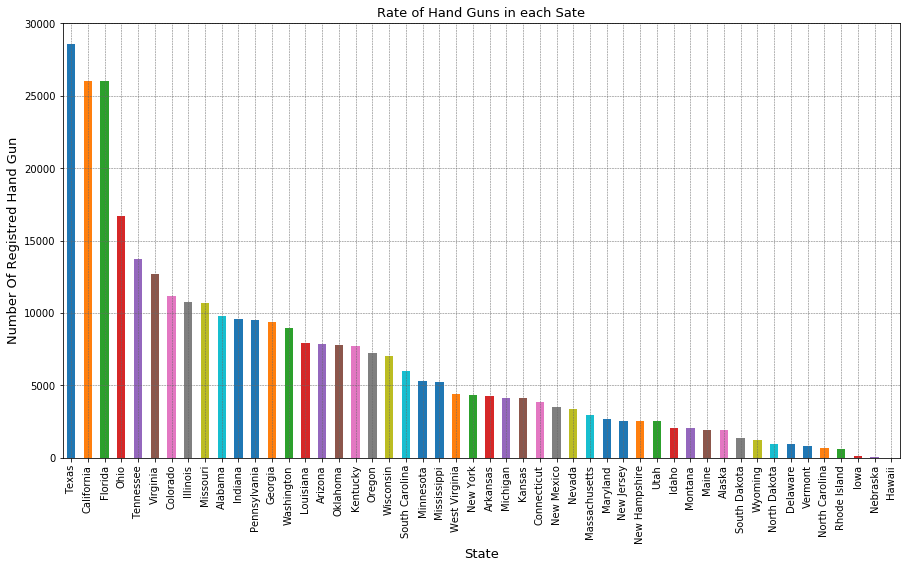

In [166]:
plot_7.plot(kind="bar",figsize=(15,8))
plt.xlabel("State",fontsize=13)
plt.ylabel("Number Of Registred Hand Gun", fontsize=13)
plt.title("Rate of Hand Guns in each Sate",fontsize=13)
plt.grid(color = 'dimgrey', linestyle = '--', linewidth = 0.5);

**Texas has the highest rate of hand gun compare to other cities**

# Which state has the highest Long Gun Rate ?

In [167]:
# group the hand long gun on each state
plot_8 = gun_clean.groupby("state")["long_gun"].agg("mean").sort_values(ascending=False)

In [168]:
# change the Series to DataFrame
lon_gun_rate = pd.DataFrame(plot_8)

In [169]:
lon_gun_rate.head()

,long_gun
state,
Pennsylvania,41337.629956
Texas,33706.590308
California,26153.171806
Florida,16868.237885
Ohio,16063.105727


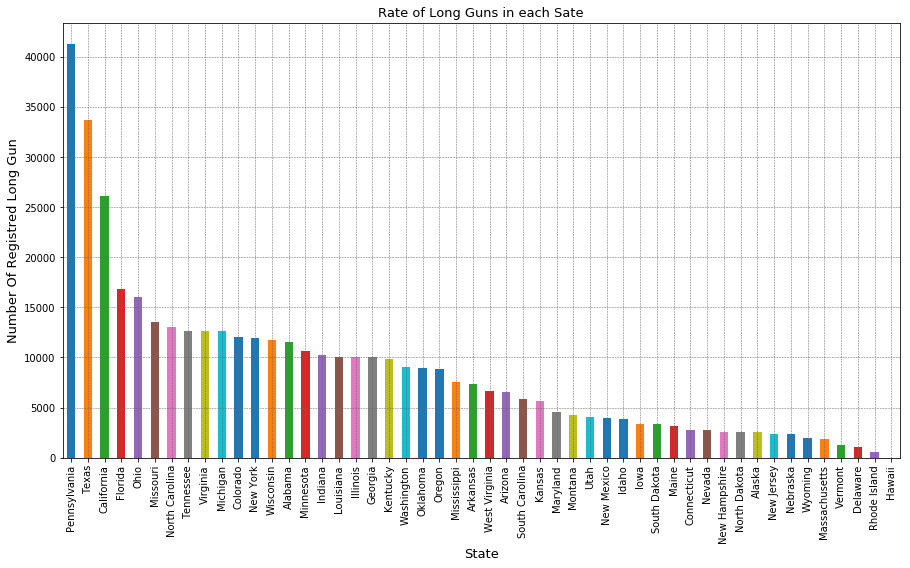

In [170]:
plot_8.plot(kind="bar",figsize=(15,8))
plt.xlabel("State",fontsize=13)
plt.ylabel("Number Of Registred Long Gun", fontsize=13)
plt.title("Rate of Long Guns in each Sate",fontsize=13)
plt.grid(color = 'dimgrey', linestyle = '--', linewidth = 0.5);

**Pennsylvania has the highest long gun rate over the other cities**

In [171]:
# let combine the gun and census DataFrame together
merge_data  = gun_clean.merge(census_clean, left_on='state', right_on='state', how='inner')
merge_data = merge_data.drop(columns=["month","year","Year","permit"], axis=1)

In [172]:
merge_data.head()

,state,handgun,long_gun,other,multiple,totals,Yr,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)"
0,Alabama,5734.0,6320.0,221.0,317,32019,2017,4863300.0,4780131.0
1,Alabama,6289.0,6045.0,216.0,311,35038,2017,4863300.0,4780131.0
2,Alabama,6046.0,4790.0,224.0,258,31474,2017,4863300.0,4780131.0
3,Alabama,8275.0,4782.0,254.0,334,35687,2017,4863300.0,4780131.0
4,Alabama,7198.0,4559.0,254.0,309,33331,2017,4863300.0,4780131.0


# Which census data is most associated with high Gun per capita

 *let sort the data for 2010 and 2016 first*


In [173]:
# sorting 2016 dataset
pop_2016 = merge_data[merge_data["Yr"]==2016]

In [174]:
pop_2016.head()

,state,handgun,long_gun,other,multiple,totals,Yr,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)"
9,Alabama,13733.0,17519.0,376.0,533,62014,2016,4863300.0,4780131.0
10,Alabama,10214.0,13470.0,388.0,599,50477,2016,4863300.0,4780131.0
11,Alabama,7757.0,8865.0,403.0,429,43251,2016,4863300.0,4780131.0
12,Alabama,7125.0,8449.0,319.0,372,41336,2016,4863300.0,4780131.0
13,Alabama,8243.0,7808.0,352.0,384,42455,2016,4863300.0,4780131.0


In [175]:
# the proportion of gun per capita associated with 2016 census data
prop_p_cap_2016 = pop_2016["totals"].sum()/pop_2016["Population estimates, July 1, 2016,  (V2016)"].sum()

In [176]:
prop_p_cap_2016

0.0070827156194480396

In [177]:
print("The percentage of 2016 Gun per capital is {}".format((prop_p_cap_2016)*100))

The percentage of 2016 Gun per capital is 0.708271561944804


In [178]:
# sorting 2010 dataset
pop_2010 = merge_data[merge_data["Yr"]==2010]

In [179]:
pop_2010.head()

,state,handgun,long_gun,other,multiple,totals,Yr,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)"
81,Alabama,13978.0,24298.0,152.0,569,43266,2010,4863300.0,4780131.0
82,Alabama,9943.0,17513.0,122.0,487,32668,2010,4863300.0,4780131.0
83,Alabama,8410.0,12198.0,108.0,433,25403,2010,4863300.0,4780131.0
84,Alabama,8294.0,10525.0,124.0,415,23344,2010,4863300.0,4780131.0
85,Alabama,9180.0,10361.0,142.0,457,23813,2010,4863300.0,4780131.0


In [180]:
# the proportion of gun per capita associated with 2010 census data
prop_p_cap_2010 = pop_2010["totals"].sum()/pop_2010["Population estimates base, April 1, 2010,  (V2016)"].sum()

In [181]:
prop_p_cap_2010

0.0038697689530032137

In [182]:
print("The percentage of 2010 Gun per capital is {}".format((prop_p_cap_2010)*100))

The percentage of 2010 Gun per capital is 0.38697689530032137


In [183]:
# let convert proportion per capital in to dictionary
proportion = [{"2010":0.003698270609114439,
             "20016":0.00708271561944804}]

In [184]:
# let convert our dictionary in to dataframe
prop_capital = pd.DataFrame(proportion)

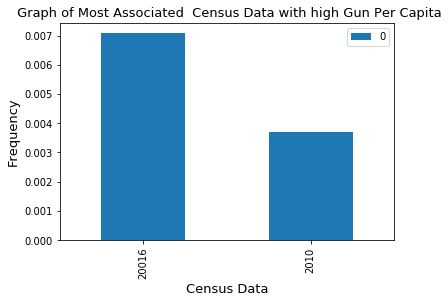

In [185]:
prop_capital.T.plot(kind="bar")
plt.xlabel("Census Data", fontsize= 13)
plt.ylabel("Frequency",fontsize= 13)
plt.title(" Graph of Most Associated  Census Data with high Gun Per Capita",fontsize= 13);

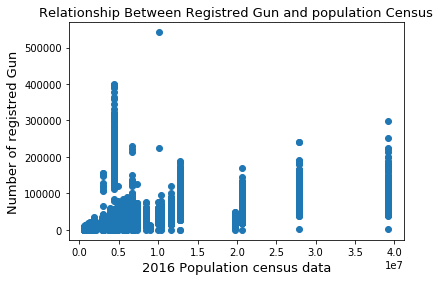

In [186]:
# let check the relationship between number of registred gun and population census data
plt.scatter(y=merge_data["totals"], x = merge_data["Population estimates, July 1, 2016,  (V2016)"])
plt.xlabel("2016 Population census data", fontsize=13)
plt.ylabel("Number of registred Gun",fontsize=13)
plt.title("Relationship Between Registred Gun and population Census", fontsize=13);

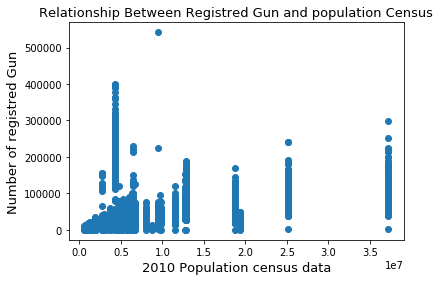

In [187]:
#let check the relationship between number of registred gun and population census data
plt.scatter(y=merge_data["totals"], x = merge_data["Population estimates base, April 1, 2010,  (V2016)"])
plt.xlabel("2010 Population census data", fontsize=13)
plt.ylabel("Number of registred Gun",fontsize=13)
plt.title("Relationship Between Registred Gun and population Census", fontsize=13);

**there is positive corelation between the number of registred gun and population census**

# Conclusions

My final conclusions regarding both population census  and gun data, at first stage both of the data share some smilar varialble
state and date, Base on the distribution of gun data it clearly show that majority of the gun does not exceed 100,000 registration
per month, according to the gun registration trend it is clearly show that Number of gun registration is significantly increasing 
over times, 2016 has a highest gun registration followed by 2017 and most of the gun are registred during december period, 
the top 10 cities with the highest number of gun registration are Kentucky,Texas,CaliforniaIllinois,Pennsylvania,Florida,Ohio
North Carolina,Indian,Tennesse, Long gun is the most purchased gun type between the year of 1997 to 2010 while Hand gun is most purchased gun
type in the year above 2010, 2016 popullation census data is the most associated with high gun per capita with 0.708 percent over the
the 2010 population census data with 0.387 percent, finally tthere is positive corelation between the number of registred gun and population census

Regarding to my data limitation, i have noticed there is an outlier in kentucky data, moreover Illinois might be an outlier too because it 
has been registered a high gun registration in the U.S however, Illinois has the strictest gun control in America, finally there is state 
missing record in the population census data.

In [188]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255